In [ ]:
#Instalando Libs
!pip install pycaret
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.1 MB/s

In [ ]:
#importando bibliotecas
import pandas as pd
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
#Escolher uma ação
df = yf.Ticker('RADL3.SA')

#Escolher o intervalo de dados
raia = df.history(period='2y')
raia

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-02 00:00:00-03:00,21.483247,21.896928,21.417435,21.586668,5099432,0.0,0.0
2022-02-03 00:00:00-03:00,21.624275,21.887528,21.276407,21.304613,4175184,0.0,0.0
2022-02-04 00:00:00-03:00,21.257599,21.332814,20.543059,20.665283,4759976,0.0,0.0
2022-02-07 00:00:00-03:00,20.655883,20.984948,20.496052,20.693491,4404088,0.0,0.0
2022-02-08 00:00:00-03:00,20.402031,20.599470,20.242201,20.590069,2938936,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-29 00:00:00-03:00,26.150000,26.459999,26.059999,26.299999,2785700,0.0,0.0
2024-01-30 00:00:00-03:00,26.290001,26.350000,25.900000,26.250000,5434800,0.0,0.0
2024-01-31 00:00:00-03:00,25.950001,26.040001,25.170000,25.299999,26642900,0.0,0.0


In [ ]:
#Refazendo o DF - retirar Dividends e Stock Splits
raia = raia.drop(['Dividends','Stock Splits'], axis=1)

In [ ]:
#Criando novos Campos

#Média móvel para 7 dias
raia['MM7D'] = raia['Close'].rolling(window =7).mean().round(2)

#Média móvel para 30 dias
raia['MM30D'] = raia['Close'].rolling(window =30).mean().round(2)
raia

,Open,High,Low,Close,Volume,MM7D,MM30D
Date,,,,,,,
2022-02-02 00:00:00-03:00,21.483247,21.896928,21.417435,21.586668,5099432,NaN,NaN
2022-02-03 00:00:00-03:00,21.624275,21.887528,21.276407,21.304613,4175184,NaN,NaN
2022-02-04 00:00:00-03:00,21.257599,21.332814,20.543059,20.665283,4759976,NaN,NaN
2022-02-07 00:00:00-03:00,20.655883,20.984948,20.496052,20.693491,4404088,NaN,NaN
2022-02-08 00:00:00-03:00,20.402031,20.599470,20.242201,20.590069,2938936,NaN,NaN
...,...,...,...,...,...,...,...
2024-01-29 00:00:00-03:00,26.150000,26.459999,26.059999,26.299999,2785700,26.40,28.24
2024-01-30 00:00:00-03:00,26.290001,26.350000,25.900000,26.250000,5434800,26.30,28.14
2024-01-31 00:00:00-03:00,25.950001,26.040001,25.170000,25.299999,26642900,26.13,28.00


In [ ]:
#Coletar últimos 5 dias
raia_prever = raia.tail(6)
raia_prever.drop(raia_prever.tail(1).index, inplace=True)
raia_prever

<ipython-input-6-7785e1996dc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raia_prever.drop(raia_prever.tail(1).index, inplace=True)


,Open,High,Low,Close,Volume,MM7D,MM30D
Date,,,,,,,
2024-01-26 00:00:00-03:00,26.129999,26.379999,25.870001,26.160000,3835700,26.55,28.35
2024-01-29 00:00:00-03:00,26.150000,26.459999,26.059999,26.299999,2785700,26.40,28.24
2024-01-30 00:00:00-03:00,26.290001,26.350000,25.900000,26.250000,5434800,26.30,28.14
2024-01-31 00:00:00-03:00,25.950001,26.040001,25.170000,25.299999,26642900,26.13,28.00
2024-02-01 00:00:00-03:00,25.219999,25.350000,24.950001,25.120001,9930200,25.87,27.87


In [ ]:
#Retirar os dados do DF
raia.drop(raia.tail(6).index, inplace=True)
raia

,Open,High,Low,Close,Volume,MM7D,MM30D
Date,,,,,,,
2022-02-02 00:00:00-03:00,21.483247,21.896928,21.417435,21.586668,5099432,NaN,NaN
2022-02-03 00:00:00-03:00,21.624275,21.887528,21.276407,21.304613,4175184,NaN,NaN
2022-02-04 00:00:00-03:00,21.257599,21.332814,20.543059,20.665283,4759976,NaN,NaN
2022-02-07 00:00:00-03:00,20.655883,20.984948,20.496052,20.693491,4404088,NaN,NaN
2022-02-08 00:00:00-03:00,20.402031,20.599470,20.242201,20.590069,2938936,NaN,NaN
...,...,...,...,...,...,...,...
2024-01-19 00:00:00-03:00,27.410000,27.459999,26.700001,26.900000,7834500,27.69,28.68
2024-01-22 00:00:00-03:00,26.799999,26.820000,26.309999,26.490000,4622200,27.45,28.61
2024-01-23 00:00:00-03:00,26.520000,27.010000,26.299999,26.940001,18694100,27.27,28.57


In [ ]:
#Empurra para frente os valores das ações
raia.Close = raia.Close.shift(-1)
raia

,Open,High,Low,Close,Volume,MM7D,MM30D
Date,,,,,,,
2022-02-02 00:00:00-03:00,21.483247,21.896928,21.417435,21.304613,5099432,NaN,NaN
2022-02-03 00:00:00-03:00,21.624275,21.887528,21.276407,20.665283,4175184,NaN,NaN
2022-02-04 00:00:00-03:00,21.257599,21.332814,20.543059,20.693491,4759976,NaN,NaN
2022-02-07 00:00:00-03:00,20.655883,20.984948,20.496052,20.590069,4404088,NaN,NaN
2022-02-08 00:00:00-03:00,20.402031,20.599470,20.242201,21.154179,2938936,NaN,NaN
...,...,...,...,...,...,...,...
2024-01-19 00:00:00-03:00,27.410000,27.459999,26.700001,26.490000,7834500,27.69,28.68
2024-01-22 00:00:00-03:00,26.799999,26.820000,26.309999,26.940001,4622200,27.45,28.61
2024-01-23 00:00:00-03:00,26.520000,27.010000,26.299999,25.990000,18694100,27.27,28.57


In [ ]:
#Removendo NaN
raia.dropna(inplace=True)
raia

,Open,High,Low,Close,Volume,MM7D,MM30D
Date,,,,,,,
2022-03-17 00:00:00-03:00,21.041360,21.144781,20.702894,21.379829,3967392,21.03,21.45
2022-03-18 00:00:00-03:00,21.135381,21.605475,20.862728,21.107170,9753640,20.99,21.45
2022-03-21 00:00:00-03:00,21.633674,21.633674,20.984946,21.417435,3723096,21.01,21.44
2022-03-22 00:00:00-03:00,21.276406,21.840518,21.229397,21.577265,9963720,21.11,21.47
2022-03-23 00:00:00-03:00,21.492648,21.746498,21.154182,21.896927,4017312,21.25,21.50
...,...,...,...,...,...,...,...
2024-01-18 00:00:00-03:00,27.500000,27.620001,27.200001,26.900000,5438300,27.94,28.73
2024-01-19 00:00:00-03:00,27.410000,27.459999,26.700001,26.490000,7834500,27.69,28.68
2024-01-22 00:00:00-03:00,26.799999,26.820000,26.309999,26.940001,4622200,27.45,28.61


In [ ]:
#Resetar index
raia.reset_index(drop=True, inplace=True)
raia_prever.reset_index(drop=True, inplace=True)

In [ ]:
#Importar a bibilioteca de regrassão do Pycaret
from pycaret.regression import *
setup(data= raia, target='Close', session_id=123)

,Description,Value
0,Session id,123
1,Target,Close
2,Target type,Regression
3,Original data shape,"(464, 7)"
4,Transformed data shape,"(464, 7)"
5,Transformed train set shape,"(324, 7)"
6,Transformed test set shape,"(140, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [ ]:
#Gerar modelos e comparar o top 3 baseado no R2
top3 = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.3237,0.1758,0.4156,0.9841,0.0172,0.0138,1.1320
br,Bayesian Ridge,0.3236,0.1759,0.4157,0.9841,0.0172,0.0138,0.0640
ridge,Ridge Regression,0.3234,0.1759,0.4157,0.9841,0.0172,0.0138,0.0380
lar,Least Angle Regression,0.3237,0.1758,0.4156,0.9841,0.0172,0.0138,0.0400
et,Extra Trees Regressor,0.3610,0.2179,0.4613,0.9806,0.0192,0.0155,0.1580
rf,Random Forest Regressor,0.3671,0.2351,0.4772,0.9792,0.0199,0.0158,0.2190
gbr,Gradient Boosting Regressor,0.3709,0.2391,0.4841,0.9782,0.0200,0.0158,0.1680
lightgbm,Light Gradient Boosting Machine,0.3826,0.2490,0.4963,0.9773,0.0208,0.0165,0.6320
en,Elastic Net,0.3916,0.2543,0.4994,0.9769,0.0211,0.0169,0.0380
lasso,Lasso Regression,0.4206,0.2821,0.5269,0.9749,0.0221,0.0182,0.0390


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [ ]:
ridge = create_model('ridge', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3495,0.1790,0.4231,0.9788,0.0180,0.0152
1,0.3546,0.2298,0.4794,0.9853,0.0195,0.0153
2,0.3770,0.2656,0.5153,0.9771,0.0205,0.0158
3,0.3469,0.1916,0.4377,0.9730,0.0180,0.0144
4,0.2495,0.1308,0.3616,0.9884,0.0152,0.0107
5,0.3462,0.2075,0.4555,0.9855,0.0184,0.0147
6,0.3220,0.1577,0.3971,0.9846,0.0161,0.0136
7,0.2764,0.1224,0.3499,0.9906,0.0146,0.0118
8,0.3488,0.1657,0.4071,0.9864,0.0170,0.0147


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr = create_model('lr', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3437,0.1744,0.4176,0.9793,0.0178,0.0149
1,0.3541,0.2306,0.4802,0.9853,0.0195,0.0153
2,0.3766,0.2625,0.5123,0.9774,0.0204,0.0157
3,0.3480,0.1949,0.4414,0.9725,0.0181,0.0144
4,0.2489,0.1285,0.3584,0.9886,0.0150,0.0107
5,0.3454,0.2072,0.4552,0.9855,0.0183,0.0146
6,0.3230,0.1580,0.3975,0.9846,0.0161,0.0136
7,0.2785,0.1243,0.3526,0.9905,0.0147,0.0119
8,0.3538,0.1690,0.4111,0.9861,0.0171,0.0149


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
br = create_model('br', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3486,0.1783,0.4223,0.9789,0.0180,0.0151
1,0.3544,0.2299,0.4795,0.9853,0.0195,0.0153
2,0.3769,0.2648,0.5146,0.9772,0.0205,0.0158
3,0.3472,0.1925,0.4387,0.9729,0.0180,0.0144
4,0.2494,0.1303,0.3610,0.9884,0.0152,0.0107
5,0.3460,0.2074,0.4554,0.9855,0.0184,0.0147
6,0.3222,0.1577,0.3972,0.9846,0.0161,0.0136
7,0.2769,0.1228,0.3504,0.9906,0.0146,0.0118
8,0.3502,0.1666,0.4081,0.9863,0.0170,0.0148


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#Tunning ridge - Buscando melhores resultados
ridge_parameters = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
tune_ridge = tune_model(ridge, n_iter=1000, optimize='RMSE', custom_grid=ridge_parameters)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3439,0.1745,0.4177,0.9793,0.0178,0.0149
1,0.3541,0.2306,0.4802,0.9853,0.0195,0.0153
2,0.3766,0.2626,0.5124,0.9774,0.0204,0.0157
3,0.3479,0.1948,0.4413,0.9725,0.0181,0.0144
4,0.2489,0.1285,0.3585,0.9886,0.0150,0.0107
5,0.3454,0.2072,0.4552,0.9855,0.0183,0.0146
6,0.3229,0.1580,0.3975,0.9846,0.0161,0.0136
7,0.2785,0.1242,0.3525,0.9905,0.0147,0.0119
8,0.3536,0.1689,0.4109,0.9861,0.0171,0.0149


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [ ]:
#Tunning Lr - Buscando melhores resultados
tune_lr = tune_model(lr, n_iter=1000, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3437,0.1744,0.4176,0.9793,0.0178,0.0149
1,0.3541,0.2306,0.4802,0.9853,0.0195,0.0153
2,0.3766,0.2625,0.5123,0.9774,0.0204,0.0157
3,0.3480,0.1949,0.4414,0.9725,0.0181,0.0144
4,0.2489,0.1285,0.3584,0.9886,0.0150,0.0107
5,0.3454,0.2072,0.4552,0.9855,0.0183,0.0146
6,0.3230,0.1580,0.3975,0.9846,0.0161,0.0136
7,0.2785,0.1243,0.3526,0.9905,0.0147,0.0119
8,0.3538,0.1690,0.4111,0.9861,0.0171,0.0149


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
#Tunning Br - Buscando melhores resultados
tune_br = tune_model(br, n_iter=1000, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3470,0.1769,0.4207,0.9790,0.0179,0.0151
1,0.3543,0.2301,0.4796,0.9853,0.0195,0.0153
2,0.3768,0.2640,0.5138,0.9772,0.0205,0.0158
3,0.3474,0.1931,0.4395,0.9728,0.0181,0.0144
4,0.2492,0.1297,0.3601,0.9884,0.0151,0.0107
5,0.3458,0.2073,0.4553,0.9855,0.0184,0.0147
6,0.3225,0.1578,0.3972,0.9846,0.0161,0.0136
7,0.2774,0.1232,0.3510,0.9905,0.0146,0.0119
8,0.3512,0.1672,0.4090,0.9862,0.0170,0.0148


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


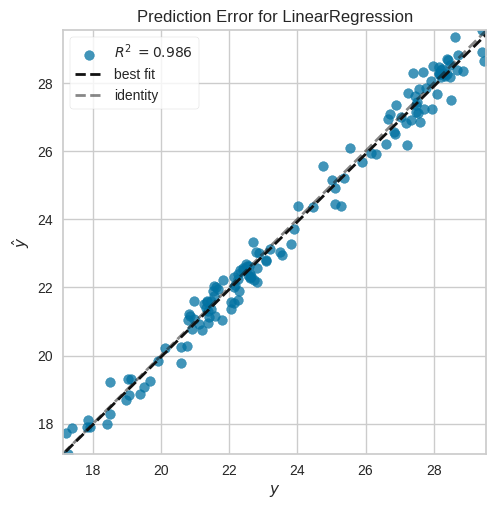

In [ ]:
#Gráficos de erro
plot_model(tune_lr, plot='error')

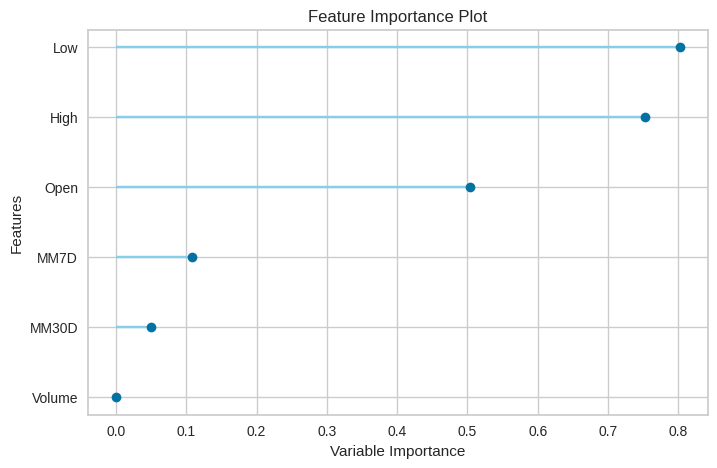

In [ ]:
plot_model(tune_lr, plot='feature')

In [ ]:
#Testando com dados de Treinamento
predict_model(tune_lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.3306,0.1597,0.3997,0.9860,0.0162,0.0140


,Open,High,Low,Volume,MM7D,MM30D,Close,prediction_label
49,19.174118,19.447226,18.872755,5053568,18.080000,18.969999,19.127029,19.318954
85,19.493010,19.568529,18.992706,4809792,19.150000,18.680000,18.511282,19.219995
34,18.260612,18.260612,17.714396,7900776,19.120001,21.120001,17.827412,17.897385
235,22.485062,22.561121,21.962154,4770896,22.260000,22.870001,21.810038,22.217212
237,21.867081,21.971663,21.505800,3382704,22.150000,22.790001,21.562847,21.753370
...,...,...,...,...,...,...,...,...
181,22.367062,23.012083,22.082493,11506144,21.900000,22.790001,22.575748,22.619177
403,26.169151,26.308666,25.740639,5820000,26.370001,27.129999,26.149220,25.956850
6,21.915733,22.385826,21.802910,5368688,21.540001,21.580000,22.254196,22.246832
191,21.762503,22.646694,21.553339,6714032,21.420000,22.070000,22.627678,22.331847


In [ ]:
#Finalizar o modelo
final_lr_model = finalize_model(tune_lr)

In [ ]:
#Previsão
prev = predict_model(final_lr_model, data=raia_prever)
prev

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0830,0.0094,0.0970,0.9636,0.0036,0.0032


,Open,High,Low,Volume,MM7D,MM30D,Close,prediction_label
0,26.129999,26.379999,25.870001,3835700,26.549999,28.350000,26.160000,26.178094
1,26.150000,26.459999,26.059999,2785700,26.400000,28.240000,26.299999,26.406851
2,26.290001,26.350000,25.900000,5434800,26.299999,28.139999,26.250000,26.097060
3,25.950001,26.040001,25.170000,26642900,26.129999,28.000000,25.299999,25.196015
4,25.219999,25.350000,24.950001,9930200,25.870001,27.870001,25.120001,25.086689


In [ ]:
#Salvando o modelo para utilizar com dados novos
save_model(final_lr_model, 'Modelo Final Linear Regression Pycaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Open', 'High', 'Low', 'Volume',
                                              'MM7D', 'MM30D'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('actual_estimator', LinearRegression(n_jobs=-1))]),
 'Modelo Final Linear Regression Pycaret.pkl')

In [ ]:
#Dados Novos
novo_dado = yf.download('RADL3.SA', period='45d')
novo_dado

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-29,29.600000,29.730000,28.330000,28.330000,28.231989,7255600
2023-11-30,28.400000,28.430000,27.500000,28.080000,27.982853,19272500
2023-12-01,28.049999,28.250000,27.650000,28.049999,27.952957,5269500
2023-12-04,27.959999,28.450001,27.860001,28.180000,28.082508,2732700
2023-12-05,28.350000,28.959999,28.350000,28.570000,28.471159,4504900
2023-12-06,28.670000,28.730000,28.270000,28.629999,28.530951,3479000
2023-12-07,28.690001,28.840000,28.090000,28.240000,28.192329,3952500
2023-12-08,28.360001,28.520000,28.049999,28.190001,28.142414,3065800
2023-12-11,28.190001,28.500000,28.020000,28.250000,28.202312,3384600


In [ ]:
#Retirar campos
novo_dado = novo_dado.drop('Adj Close', axis=1)

#Retirar Index
novo_dado.reset_index(drop=True, inplace=True)

#Criar novos Campos

novo_dado['MM7D'] = novo_dado['Close'].rolling(window =7).mean().round(2)
novo_dado['MM30D'] = novo_dado['Close'].rolling(window =30).mean().round(2)

novo_dado

,Open,High,Low,Close,Volume,MM7D,MM30D
0,29.600000,29.730000,28.330000,28.330000,7255600,NaN,NaN
1,28.400000,28.430000,27.500000,28.080000,19272500,NaN,NaN
2,28.049999,28.250000,27.650000,28.049999,5269500,NaN,NaN
3,27.959999,28.450001,27.860001,28.180000,2732700,NaN,NaN
4,28.350000,28.959999,28.350000,28.570000,4504900,NaN,NaN
5,28.670000,28.730000,28.270000,28.629999,3479000,NaN,NaN
6,28.690001,28.840000,28.090000,28.240000,3952500,28.30,NaN
7,28.360001,28.520000,28.049999,28.190001,3065800,28.28,NaN
8,28.190001,28.500000,28.020000,28.250000,3384600,28.30,NaN
9,28.420000,28.670000,28.180000,28.450001,3228000,28.36,NaN


In [ ]:
novo_dado = novo_dado.tail(1)
novo_dado

,Open,High,Low,Close,Volume,MM7D,MM30D
44,25.040001,25.16,24.629999,24.860001,10577900,25.71,27.73


In [ ]:
#Reutilizando modelo
saved_final_lr_model = load_model('Modelo Final Linear Regression Pycaret')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
#Prevendo o novo dado
nova_previsão = predict_model(saved_final_lr_model, data=novo_dado)
nova_previsão.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0783,0.0061,0.0783,nan,0.0030,0.0032


,Open,High,Low,Volume,MM7D,MM30D,Close,prediction_label
44,25.040001,25.16,24.629999,10577900,25.709999,27.73,24.860001,24.78166


finalizando, a previsão de fechamento para o próximo dia é de 27.64

#Gráfico comparativo entre fechamento real e previsões

In [ ]:
import matplotlib.pyplot as plt

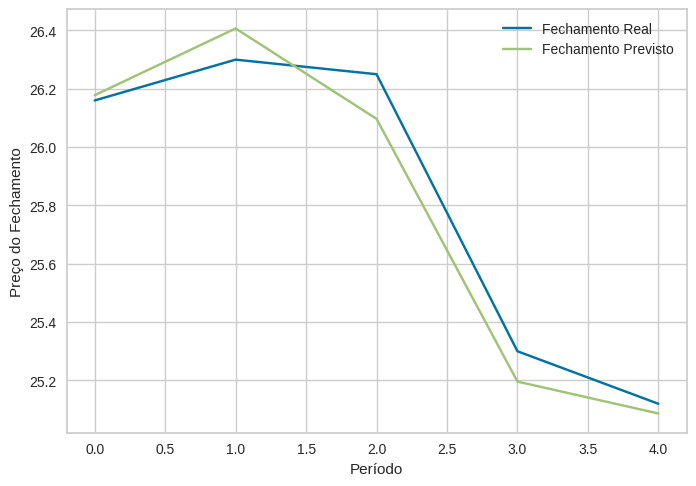

In [ ]:
plt.ylabel('Preço do Fechamento')
plt.xlabel('Período')
plt.plot(prev['Close'])
plt.plot(prev['prediction_label'])
plt.legend(['Fechamento Real','Fechamento Previsto'])